#### Using pygalfitm with S-PLUS

##### You should check out the example.ipynb first to understand the basics of pygalfitm.

This package was developed having s-plus in mind, so we created a simple function to fill the base parameters to the PyGalfitm class and sersic component params also.

First import Pygalfitm and connect to your splusdata account. (same as splus.cloud)

Also import from pygalfitm.VOs import splus module

In [1]:
from pygalfitm.VOs import splus

from pygalfitm import PyGalfitm
import splusdata

from astropy.io import fits
import os

conn = splusdata.connect()

You have access to internal data


In [124]:
import numpy as np
import cv2

def rgb_to_hue(rgb_color):
    """Convert an RGB color to HSV and return the hue value."""
    hsv_color = cv2.cvtColor(np.uint8([[rgb_color]]), cv2.COLOR_RGB2HSV)[0][0]
    return hsv_color[0]

def apply_colorfilter(im, target_color=(255, 255, 255), thresh=40, saturation_fraction=0.5):
    """
    Apply a color filter to a detected galaxy in the image.
    
    Parameters:
    - im: path to the image file.
    - target_color: a tuple representing the target RGB color. 
    """
    
    # Get the hue of the target color
    target_hue = rgb_to_hue(target_color)

    # Load the image
    img = cv2.imread(im)

    # Convert the image to grayscale for thresholding
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    _, thresh = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)

    # Find contours to identify the galaxy
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask
    mask = np.zeros_like(gray)

    # Fill the detected galaxy contour on the mask with white color
    cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

    # Convert the image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Adjust the hue of the detected galaxy using the mask
    hsv[:,:,0] = np.where(mask == 255, target_hue, hsv[:,:,0])
    
    # Set a reduced saturation for the detected galaxy to get a lighter color
    hsv[:,:,1] = np.where(mask == 255, int(255 * saturation_fraction), hsv[:,:,1])

    # Convert back to BGR
    filtered_galaxy = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Use the mask to combine the filtered galaxy with the original image
    result = cv2.bitwise_and(filtered_galaxy, filtered_galaxy, mask=mask) + cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

    # Save the result
    cv2.imwrite(im, result)


#### Set the data folder where all input and psf images will be stored and output folder where feedmes and results will be stored

In [2]:
import os

DATA_FOLDER = "dev/data"
OUTPUT_FOLDER = "dev/outputs"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

In [3]:
SPLUS_WAVELENGHTS = {
    "i": 7670.59,
    "r": 6251.83,
    "g": 4758.49,
    "z": 8936.64,
    "u": 3533.29,
    "J0378": 3773.13,
    "J0395": 3940.70,
    "J0410": 4095.27,
    "J0430": 4292.39,
    "J0515": 5133.15,
    "J0660": 6613.88,
    "J0861": 8607.59
}

sorted_wavelengths = sorted(SPLUS_WAVELENGHTS, key=SPLUS_WAVELENGHTS.get)
bands = sorted_wavelengths

#### Here we call **splus.get_splus_class** that is going to return a PyGalfitm object 

In [42]:
pygalgitm_object = splus.get_splus_class(
    name = "test", 
    ra = 55.90420728, ## Add your RA here 
    dec = -35.85392675, ## Add your DEC here
    cut_size = 250, ## Size of the cutout in pixels
    data_folder = DATA_FOLDER, 
    output_folder = OUTPUT_FOLDER, 
    remove_negatives = True,
    conn = conn, 
    bands=bands
)

finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


##### Check the active components

In [44]:
pygalgitm_object.active_components

['sersic']

##### Check the base 

In [45]:
pygalgitm_object.print_base()

A) dev/data/test_u.fits,dev/data/test_j0378.fits,dev/data/test_j0395.fits,dev/data/test_j0410.fits,dev/data/test_j0430.fits,dev/data/test_g.fits,dev/data/test_j0515.fits,dev/data/test_r.fits,dev/data/test_j0660.fits,dev/data/test_i.fits,dev/data/test_j0861.fits,dev/data/test_z.fits # Input data image (FITS file)
A1) u,j0378,j0395,j0410,j0430,g,j0515,r,j0660,i,j0861,z # Nick names (band labels) 
A2) 3533.29,3773.13,3940.7,4095.27,4292.39,4758.49,5133.15,6251.83,6613.88,7670.59,8607.59,8936.64 # Effective wavelenghts
B) dev/outputs/testss.fits          # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) dev/data/psf_test_u.fits,dev/data/psf_test_j0378.fits,dev/data/psf_test_j0395.fits,dev/data/psf_test_j0410.fits,dev/data/psf_test_j0430.fits,dev/data/psf_test_g.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_i.fits,dev/data/psf_test_j0861.fits,dev/data/psf_test_z.

##### Check the component

In [46]:
pygalgitm_object.print_component("sersic")

1) 125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0 1     band       # Position x [pixel]
2) 125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0 1     band       # Position y [pixel]
3) 15.891269,14.865969,15.110599,14.053285,14.263283,12.1276045,13.503282,11.415173,11.887696,11.081125,10.919271,10.857196 3     band       # Integrated magnitude
4) 15.3662615,24.310673,18.061068,27.043034,20.658737,68.679054,21.786713,67.96384,55.164497,67.788574,67.82575,67.071144 2     band       # R_e (effective radius) [pix]
5) 4,4,4,4,4,4,4,4,4,4,4,4             2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0.8034116,0.73036706,0.98206955,0.78625077,0.9795959,0.6740437,0.7252884,0.67802805,0.6054248,0.68246603,0.6667655,0.6672744 1     band       # Axis ratio (b/a)
10) -82.62477,-79.036285,-29.132893,-56.76075,66.713104,-61.66502,-36.76912,-60.310448,-67.68247,-61.730072,-63.06321,-64.2067 1     band       # Position angle (PA) [deg: Up=0, Left

#### Write the feedme and run

In [47]:
pygalgitm_object.write_feedme()
_ = pygalgitm_object.run()

#### Read output and plots

In [48]:
from pygalfitm.read import read_output_to_class

In [49]:
## This It reads the .band output and returns a PyGalfitm instance 
## with all parameters from the output.band loaded into the base and components.

out_pygal = read_output_to_class(os.path.join(OUTPUT_FOLDER, "testss.galfit.01.band"))

In [50]:
out_pygal.print_base()

A) dev/data/test_u.fits,dev/data/test_j0378.fits,dev/data/test_j0395.fits,dev/data/test_j0410.fits,dev/data/test_j0430.fits,dev/data/test_g.fits,dev/data/test_j0515.fits,dev/data/test_r.fits,dev/data/test_j0660.fits,dev/data/test_i.fits,dev/data/test_j0861.fits,dev/data/test_z.fits       # Input data image (FITS file)
A1) u,j0378,j0395,j0410,j0430,g,j0515,r,j0660,i,j0861,z      # Band labels
A2) 3533.29,3773.13,3940.70,4095.27,4292.39,4758.49,5133.15,6251.83,6613.88,7670.59,8607.59,8936.64      # Band wavelengths
B) dev/outputs/testss.fits          # Output data image block
C) none,none,none,none,none,none,none,none,none,none,none,none 0.000    # Sigma image and min. sigma factor (made from data if blank or "none")
D) dev/data/psf_test_u.fits,dev/data/psf_test_j0378.fits,dev/data/psf_test_j0395.fits,dev/data/psf_test_j0410.fits,dev/data/psf_test_j0430.fits,dev/data/psf_test_g.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_i.fit

In [51]:
out_pygal.print_component("sersic")

1) 100.440,100.440,100.440,100.440,100.440,100.440,100.440,100.440,100.440,100.440,100.440,100.440 1,0,0,0,0,0,0,0,0,0,0,0 band       #      Position x
2) 107.319,107.319,107.319,107.319,107.319,107.319,107.319,107.319,107.319,107.319,107.319,107.319 1,0,0,0,0,0,0,0,0,0,0,0 band       #      Position y
3) 11.490,11.302,11.176,11.065,10.929,10.638,10.433,9.974,9.875,9.725,9.765,9.818 1,1,1,0,0,0,0,0,0,0,0,0 band       #  Integrated magnitude
4) 418.620,413.296,409.575,406.144,401.768,391.421,383.103,358.268,350.231,326.772,305.970,298.665 1,1,0,0,0,0,0,0,0,0,0,0 band       #  R_e (effective radius)   [pix]
5) 2.765,2.779,2.788,2.797,2.808,2.835,2.856,2.920,2.940,3.001,3.054,3.073 1,1,0,0,0,0,0,0,0,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 band       #     -----
7) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 band       #     -----
8) 0,0,0,0,0,0,0,0,0,0,0,0             0,0,0,0,0,0,0,0,0,0,0,0 ban

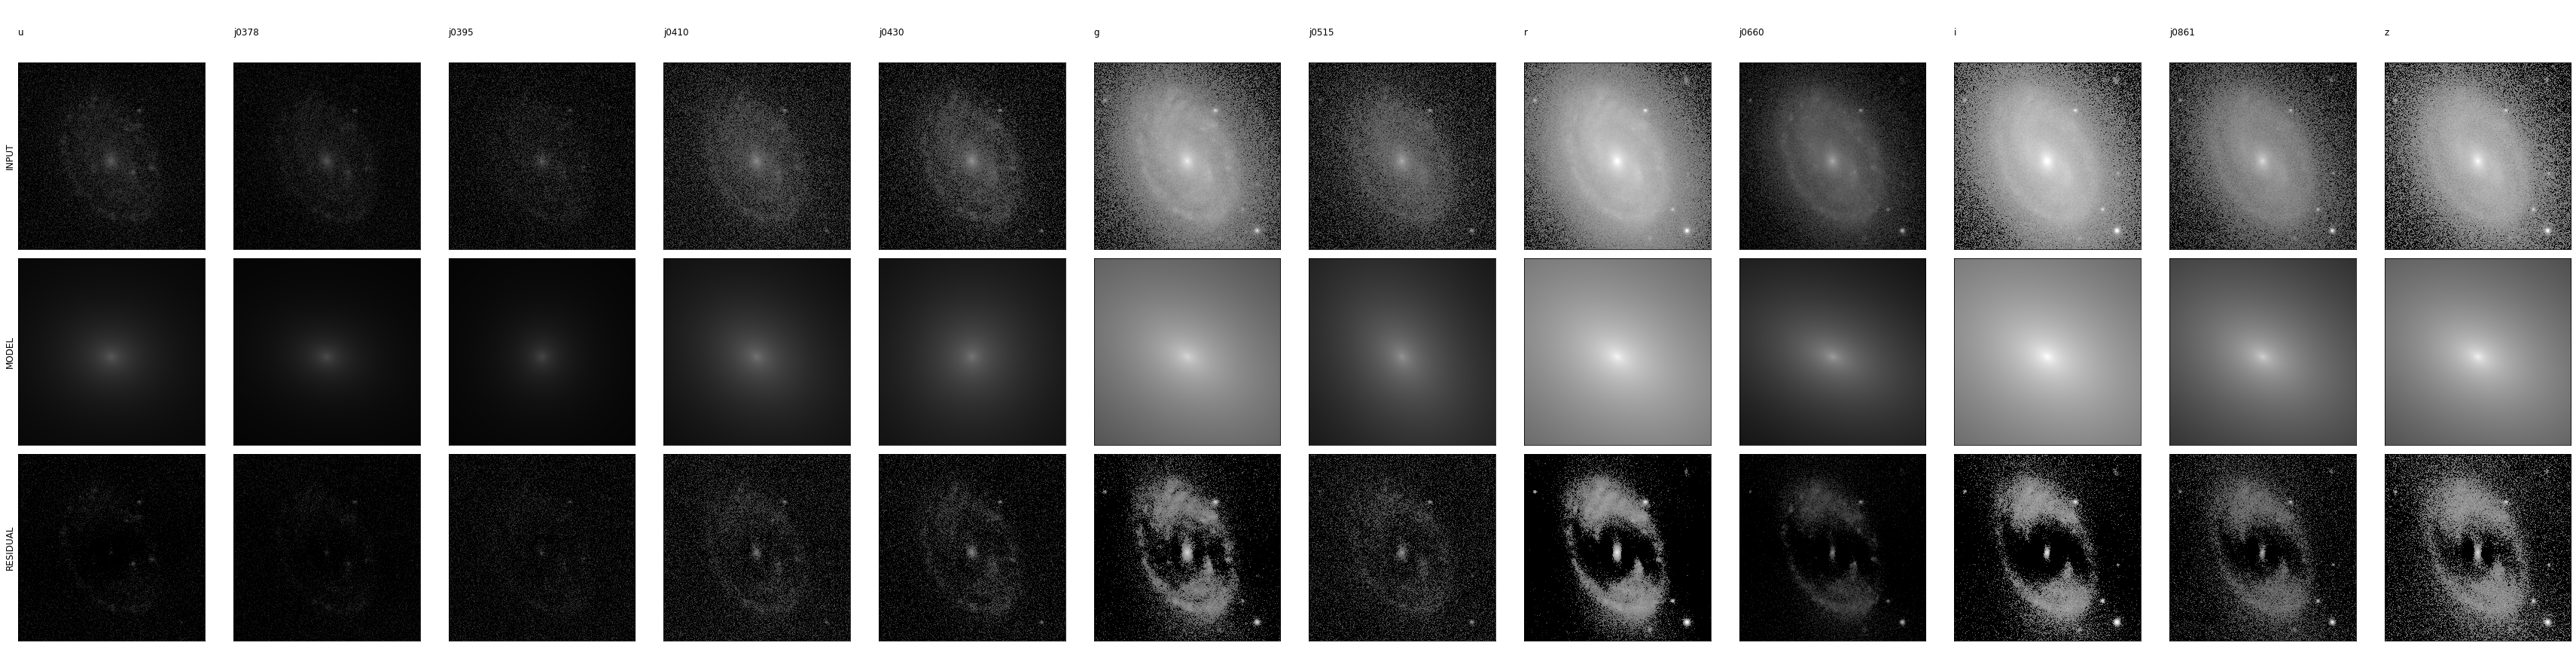

In [52]:
plot = out_pygal.gen_plot(
    "sersic", 
    return_plot = True, 
    plot_parameters=[], 
    colorbar=False
)

In [53]:
# Set the figure's face color
plot.patch.set_facecolor('none')
plot.patch.set_alpha(1)

In [54]:
plot.savefig("dev/pygalfitm.png", transparent=True)

In [22]:
out_pygal.create_fits_table(os.path.join(OUTPUT_FOLDER, "test.out.fits"))

In [104]:
fits_cube = fits.open("dev/outputs/testss.fits")

filters = out_pygal.base['A1']['value'].split(",") 
for key, band in enumerate(filters): 
    filters[key] = band.strip()

input_data = {f: fits_cube[i + 1].data for i, f in enumerate(filters)}
model_data = {f: fits_cube[i + len(filters) + 1].data for i, f in enumerate(filters)}
residual_data = {f: fits_cube[i + 2*len(filters) + 1].data for i, f in enumerate(filters)}


In [158]:
colors = {
    'i': (97, 0, 0),
    'r': (255, 99, 0),
    'g': (0, 195, 255),
    'z': (97, 0, 0),
    'u': (97, 0, 97),
    'j0378': (97, 0, 97),
    'j0395': (127, 0, 157),
    'j0410': (126, 0, 217),
    'j0430': (64, 0, 255),
    'j0515': (22, 255, 0),
    'j0660': (232, 0, 0),
    'j0861': (97, 0, 0)
}

thresholds = {
    'i': 43,
    'r': 40,
    'g': 40,
    'z': 48,
    'u': 60,
    'j0378': 110,
    'j0395': 120,
    'j0410': 71,
    'j0430': 65,
    'j0515': 50,
    'j0660': 42,
    'j0861': 40  
}

for key in input_data:
    fits.PrimaryHDU(data = input_data[key]).writeto("dev/test/input_{}.fits".format(key), overwrite = True)
    fits.PrimaryHDU(data = model_data[key]).writeto("dev/test/model_{}.fits".format(key), overwrite = True)
    fits.PrimaryHDU(data = residual_data[key]).writeto("dev/test/residual_{}.fits".format(key), overwrite = True)
    
    os.system("fitspng -o dev/test/input_{}.png dev/test/input_{}.fits".format(key, key))
    os.system("fitspng -o dev/test/model_{}.png dev/test/model_{}.fits".format(key, key))
    os.system("fitspng -o dev/test/residual_{}.png dev/test/residual_{}.fits".format(key, key))
    
    apply_colorfilter("dev/test/input_{}.png".format(key), colors[key], 10, 0.5)
    apply_colorfilter("dev/test/model_{}.png".format(key), colors[key], 10, 0.5)
    apply_colorfilter("dev/test/residual_{}.png".format(key), colors[key], 10, 0.5)

In [146]:
from PIL import Image

def open_file(path_to_file):
    im_frame = Image.open(path_to_file)
    np_frame = np.array(im_frame)
    return np_frame

In [159]:
ainput_data = {f: open_file("dev/test/input_{}.png".format(f)) for i, f in enumerate(filters)}
amodel_data = {f: open_file("dev/test/model_{}.png".format(f)) for i, f in enumerate(filters)}
aresidual_data = {f: open_file("dev/test/residual_{}.png".format(f)) for i, f in enumerate(filters)}


In [136]:
import matplotlib.pyplot as plt

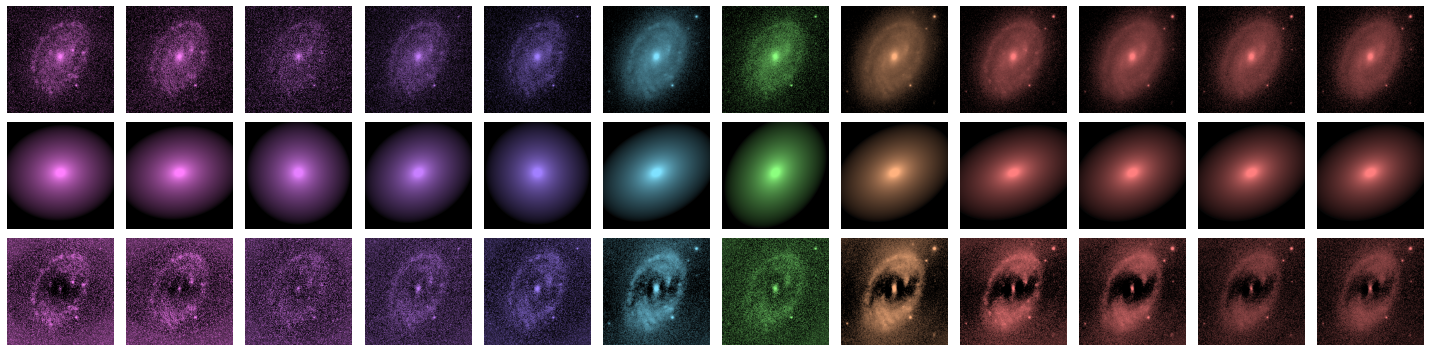

In [160]:
fig, axs = plt.subplots(3, 12, figsize=(20, 5))  # Create 3x12 subplots

# Plotting images from dict1
for i, (key, value) in enumerate(ainput_data.items()):
    axs[0, i].imshow(value, cmap='gray')
    axs[0, i].axis('off')

# Plotting images from dict2
for i, (key, value) in enumerate(amodel_data.items()):
    axs[1, i].imshow(value, cmap='gray')
    axs[1, i].axis('off')

# Plotting images from dict3
for i, (key, value) in enumerate(aresidual_data.items()):
    axs[2, i].imshow(value, cmap='gray')
    axs[2, i].axis('off')


fig.patch.set_facecolor("none")
plt.tight_layout()

fig.savefig("dev/pygalfitm.png", transparent=True)


In [164]:
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from typing import List, Tuple

from astropy.visualization import make_lupton_rgb

def get_bands(bands):
    r, g, b = bands.split(",")
    r = r.strip().lower().replace("f", "j0")
    g = g.strip().lower().replace("f", "j0")
    b = b.strip().lower().replace("f", "j0")
    return r, g, b 

def gen_color_plot(pygalfit, band_combinations=["i,r,g", "u,f378,f395"], lupton_stretch=3.5, lupton_Q=8, return_plot=False, fig_filename=None):
    """Generate a color plot to visualize the input, model, and residual data of a PyGalfit model combining 3 filters.

    Args:
        pygalfit (_type_): the PyGalfit model object, which contains the input and output data from the PyGalfit fitting.
        band_combinations (list, optional): Combination of filters to create colors, order R G B. Defaults to ["i,r,g", "u,f378,f395"].
        lupton_stretch (float, optional): Make lupton function stretch. Defaults to 3.5.
        lupton_Q (int, optional): Make lupton function Q. Defaults to 8.
        return_plot (bool, optional): a boolean indicating whether to return the plot object instead of showing it (default is False).
        fig_filename (_type_, optional): a string specifying the filename to save the plot to (default is None).

    """    
    filters = pygalfit.base['A1']['value'].split(",") 
    for key, band in enumerate(filters): 
        filters[key] = band.strip()

    fits_cube = fits.open(pygalfit.base["B"]["value"].strip())

    # Get data for each filter
    input_data = {f: fits_cube[i + 1].data for i, f in enumerate(filters)}
    model_data = {f: fits_cube[i + len(filters) + 1].data for i, f in enumerate(filters)}
    residual_data = {f: fits_cube[i + 2*len(filters) + 1].data for i, f in enumerate(filters)}

    n_rows = len(band_combinations)
    n_columns = 3

    fig, axs = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(n_columns*5, n_rows*5))

    for i, bands in enumerate(band_combinations):
        r, g, b = get_bands(bands)

        # Create RGB images
        rgb_images = [make_lupton_rgb(data[r], data[g], data[b], stretch=lupton_stretch, Q=lupton_Q) 
                      for data in (input_data, model_data, residual_data)]

        # Display images
        for j in range(n_columns):
            axs[i, j].imshow(rgb_images[j])
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

    # Label rows and columns
    for j in range(n_columns):
        axs[0, j].set_title(['Input', 'Model', 'Residual'][j], size='large')

    for i in range(n_rows):
        axs[i, 0].set_ylabel(band_combinations[i], size='large')

    # Adjust spacing between subplots and set background color
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    fig.set_facecolor('white')

    if fig_filename and not return_plot:
        fig.savefig(fig_filename)
        return 
    
    elif fig_filename and return_plot:
        fig.savefig(fig_filename)

    if return_plot:
        return fig
    else:
        plt.show()

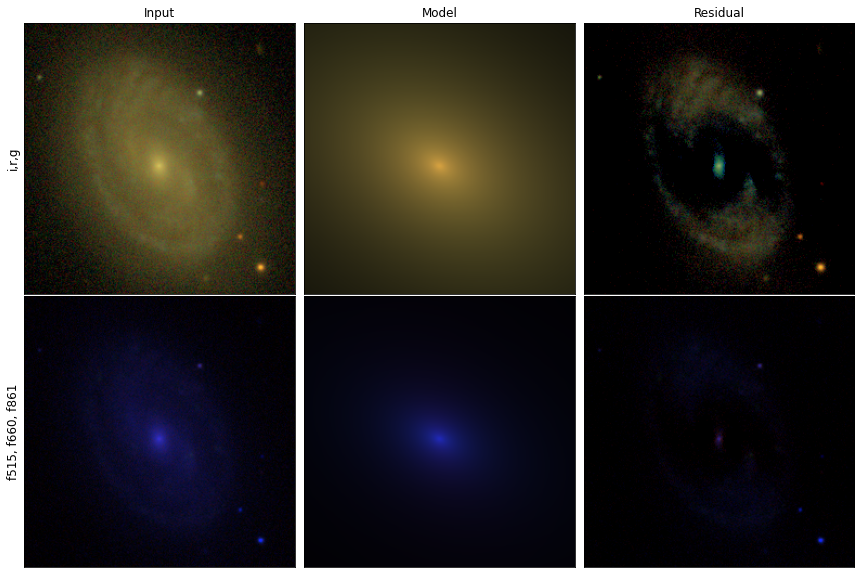

In [174]:
gen_color_plot(out_pygal, band_combinations=["i,r,g", "f515, f660, f861"], lupton_stretch=3, lupton_Q=8, return_plot=False, fig_filename=None)

In [177]:
ainput_data.keys()

dict_keys(['u', 'j0378', 'j0395', 'j0410', 'j0430', 'g', 'j0515', 'r', 'j0660', 'i', 'j0861', 'z'])